**AUTOMATION OF PHOTOGRAMMETRIC PROCESS**



*   **AUTHOR: Ives Medeiros Brandão**

*   **DATE: 25/08/2022**



**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

**Referece's matrix**

In [2]:

matrixR = np.matrix([[48,170],
                     [230,78]])


#matrixR = np.loadtxt("/content/Reference.txt")

**Search's matrix**

In [3]:

matrixP = np.matrix([[187,31,230,106],
                     [90,45,172,172],
                     [231,236,83,183],
                     [124,99,153,142]])


#matrixP = np.loadtxt("/content/Search.txt")

**Define correlation method**

In [4]:
#correlation = "fError"
#correlation = "fCrossCorrelation"
correlation = "fQuotient"
#correlation = "fCrossCovariance"
#correlation = "fCoeficientCovariance"

**Get the shape/order from matrix**

In [5]:
Cr = matrixR.shape[1]
Lr = matrixR.shape[0]

Cp = matrixP.shape[1]
Lp = matrixP.shape[0]

**Calculate alpha and beta**

In [6]:
#As the matrix in python starts its positions at `zero`, it is necessary to add a unit
#In other languages, like Scilab where poisitions starts at `one`, this process is not necessary.
alphas = Lp - Lr + 1
betas = Cp - Cr + 1

**Calculate the number of interactions**

In [7]:
interactions = ((betas) * (alphas))

**Create an empty matrix for correlations**

In [8]:
mCorrelation = np.zeros([alphas, betas])

--------------------------------------------------------------------------------

**Declaration of functions for some correlation methods**

1.   Error function;
2.   Cross - correlation function;
3.   Quotient function.





**Error function**

In [9]:
def fError(j, i, beta, alpha):
    cor = abs(matrixR[i,j] - matrixP[i+alpha,j+beta])
    return cor

**Cross - correlation function**

In [10]:
def fCrossCorrelation(j, i, beta, alpha):
    cor = (matrixR[i,j]) * (matrixP[i+alpha,j+beta])
    return cor

**Quotient function**

In [11]:
def fQuotient(j, i, beta, alpha):
    cor = (matrixP[i+alpha,j+beta])/(matrixR[i,j])
    return cor

**Calculate correlations**

In [12]:
#Dictionary for stored iteratios and its positions
dictPositions = {}

#Define the first iteration equal to one
iterations = 1

#Loops to move reference matrix at search matrix
for alpha in range(alphas):
    for beta in range(betas):

        #Verify coorelations methods
        if (correlation != "fCrossCovariance") and (correlation != "fCoeficientCovariance"):

            #Auxiliary list to stored value from position
            aux = []

            #List to store position of each pixel and assign later in the last dictionary
            listPositions = []

            #Acumulator to store correlation`s sum
            acum = 0

            #Loops to move inside reference matrix and search matrix
            for i in range(Cr):
                for j in range(Lr):

                    #It`s checking which function was used

                    if (correlation == "fError"):
                        #Call function to specific correlation method
                        values = fError(j, i, beta, alpha)
                        #Append value from function at `aux` list
                        aux.append(values)

                    elif (correlation == "fCrossCorrelation"):
                        #Call function to specific correlation method
                        values = fCrossCorrelation(j, i, beta, alpha)
                        #Append value from function at `aux` list
                        aux.append(values)

                    elif (correlation == "fQuotient"):
                        #Call function to specific correlation method
                        values = fQuotient(j, i, beta, alpha)
                        #Append value from function at `aux` list
                        aux.append(values)

                    #It`s added in the list the position from each pixel in the search matrix
                    listPositions.append(i+alpha)
                    listPositions.append(j+beta)

            #Add the iteration on the dictionary like `key` and the ist the
            #position from each pixel in the search matrix like `value`
            dictPositions[iterations] = listPositions

            #Count a new iterartion
            iterations += 1

            #Calculate correlation
            #Loop on each value auxiliar calculated
            for value in aux:
                #Sum and acumulated values
                acum = acum + value

            #Add correlation value inside correlation matrix
            mCorrelation[alpha,beta] = acum

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
        #To cross - covariance function
        elif (correlation == "fCrossCovariance"):

            #Get the mean from reference matrix
            meanR = matrixR.mean()

            #List to store position of each pixel and assign later in the last dictionary
            listPositions = []

            #List to store values calculated from search matrix
            auxP = []

            #List to store values calculated from reference matrix
            auxR = []

            #Acumulator
            acum = 0

            for i in range(Cr):
                for j in range(Lr):
                    auxR.append(matrixR[i,j])
                    auxP.append(matrixP[i+alpha,j+beta])

                    #It`s added in the list the position from each pixel in the search matrix
                    listPositions.append(i+alpha)
                    listPositions.append(j+beta)

            #Add the iteration on the dictionary like `key` and the ist the
            #position from each pixel in the search matrix like `value`
            dictPositions[iterations] = listPositions

            #Count a new iterartion
            iterations += 1

            #Calculate the mean from search matrix
            meanP = sum(auxP)/len(auxP)

            #Finally, the cross - covariance function is calculated and its
            #values already added in the acumulator
            for x in range(len(auxP)):
                acum = acum + ((auxR[x] - meanR) * (auxP[x] - meanP))

            #Add correlation value inside correlation matrix
            mCorrelation[alpha,beta] = acum

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
        #To coeficient of correlation function
        elif (correlation == "fCoeficientCovariance"):

                #Get the mean from reference matrix
                meanR = matrixR.mean()

                #List to store position of each pixel and assign later in the last dictionary
                listPositions = []

                #List to store values calculated from search matrix
                auxP = []

                #List to store values calculated from reference matrix
                auxR = []

                #Acumulators
                numerator = 0
                denominator1 = 0
                denominator2 = 0


                for i in range(Cr):
                    for j in range(Lr):
                        auxR.append(matrixR[i,j])
                        auxP.append(matrixP[i+alpha,j+beta])

                        #It`s added in the list the position from each pixel in the search matrix
                        listPositions.append(i+alpha)
                        listPositions.append(j+beta)

                #Add the iteration on the dictionary like `key` and the ist the
                #position from each pixel in the search matrix like `value`
                dictPositions[iterations] = listPositions

                #Count a new iterartion
                iterations += 1

                #Calculate the mean from search matrix
                meanP = sum(auxP)/len(auxP)

                #The numerator and denominators from coeficient of correlation
                #function are calculated
                for x in range(len(auxP)):
                    numerator = numerator + ((auxR[x] - meanR) * (auxP[x] - meanP))
                    denominator1 = denominator1 + ((auxR[x] - meanR)**2)
                    denominator2 = denominator2 + ((auxP[x] - meanP)**2)

                #Finally, it's calculated the complete formulation of coeficient
                #of correlation function
                acum = (numerator / math.sqrt(denominator1 * denominator2))

                #Add correlation value inside correlation matrix
                mCorrelation[alpha,beta] = acum

**Get best correlation**

Error function work with minimum correlation value.




In [13]:
if (correlation == "fError"):

    #Get the minimum value (better correlation) from correlation matrix
    value = mCorrelation.min()

    #Get the row wich that better correlation is positioned
    row = np.where(mCorrelation == value)[0]

    #Get the column wich that better correlation is positioned
    column = np.where(mCorrelation == value)[1]

    #Prints
    print("The better correlation is", float(value))
    print("Its position is row equal", float(row), "and column equal", float(column))

In [14]:
print(mCorrelation.shape)

(3, 3)


Quotient funtion work with correlation value closest to one.

In [15]:
if (correlation == "fQuotient"):

  #Create an empty matrix with zero values to receive values from correlation matrix less one
  quotientCalc = np.zeros([alphas, betas])

  for alpha in range(alphas):
      for beta in range(betas):
        #remove one unit from each value
        quotientCalc[alpha,beta] = abs(1 - mCorrelation[alpha,beta])

  #Get the minimum value less one unit (better correlation) from correlation matrix
  valueLessOne = quotientCalc.min()

  #Get the row wich that better correlation  less one unit is positioned
  row = np.where(quotientCalc == valueLessOne)[0]

  #Get the column wich that better correlation  less one unit is positioned
  column = np.where(quotientCalc == valueLessOne)[1]

  #Get the value (better correlation) with positions calculated at correlation matrix
  value = mCorrelation[row, column]

  #Prints
  print("The better correlation is", float(value))
  print("Its position is row equal", float(row), "and column equal", float(column))
  print(quotientCalc)

The better correlation is 4.039454226506656
Its position is row equal 1.0 and column equal 1.0
[[4.0464137  3.39955489 7.36815037]
 [5.16969473 3.03945423 6.30212145]
 [7.0090965  6.7968752  4.29136747]]


<ipython-input-15-724896900d9b>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The better correlation is", float(value))
<ipython-input-15-724896900d9b>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Its position is row equal", float(row), "and column equal", float(column))


Both Error function and Quotient funtion work with minimum correlation value. So, they are treated equals here.

In [16]:
'''
if ((correlation == "fError") or (correlation == "fQuotient")):

    #Get the minimum value (better correlation) from correlation matrix
    value = mCorrelation.min()

    #Get the row wich that better correlation is positioned
    row = np.where(mCorrelation == value)[0]

    #Get the column wich that better correlation is positioned
    column = np.where(mCorrelation == value)[1]

    #Prints
    print("The better correlation is", float(value))
    print("Its position is row equal", float(row), "and column equal", float(column))
'''

'\nif ((correlation == "fError") or (correlation == "fQuotient")):\n\n    #Get the minimum value (better correlation) from correlation matrix\n    value = mCorrelation.min()\n\n    #Get the row wich that better correlation is positioned\n    row = np.where(mCorrelation == value)[0]\n\n    #Get the column wich that better correlation is positioned\n    column = np.where(mCorrelation == value)[1]\n\n    #Prints\n    print("The better correlation is", float(value))\n    print("Its position is row equal", float(row), "and column equal", float(column))\n'

By another side, both Cross correlation function and Cross - covariance funtion work with maximum correlation value. So, they are treated equals here.

In [17]:
if ((correlation == "fCrossCorrelation") or (correlation == "fCrossCovariance") or (correlation == "fCoeficientCovariance")):

    #Get the maximum value (better correlation) from correlation matrix
    value = mCorrelation.max()

    ##Get the row wich that better correlation is positioned
    row = np.where(mCorrelation == value)[0]

    #Get the column wich that better correlation is positioned
    column = np.where(mCorrelation == value)[1]

    #Prints
    print("The better correlation is", float(value))
    print("Its position is row equal", float(row), "and line column", float(column))

**Set the name from correlation function used in code to plot at the title**

In [18]:
if (correlation == "fError"):
    correlationName = "error function"
elif (correlation == "fCrossCorrelation"):
    correlationName = "cross correlation function"
elif(correlation == "fQuotient"):
    correlationName = "quotient function"
elif(correlation == "fCrossCovariance"):
    correlationName = "cross covariance function"
elif(correlation == "fCoeficientCovariance"):
    correlationName = "coeficient of correlation function"

**Print correlation matrix**

In [19]:
print(mCorrelation)

[[5.0464137  4.39955489 8.36815037]
 [6.16969473 4.03945423 7.30212145]
 [8.0090965  7.7968752  5.29136747]]


**Figures**

1.   Distribuition of correlations by colors;
2.   Iterations and its correlations;
3.   Localization of reference matrix within the search matrix.



**First figure - Distribuition of correlations by colors**

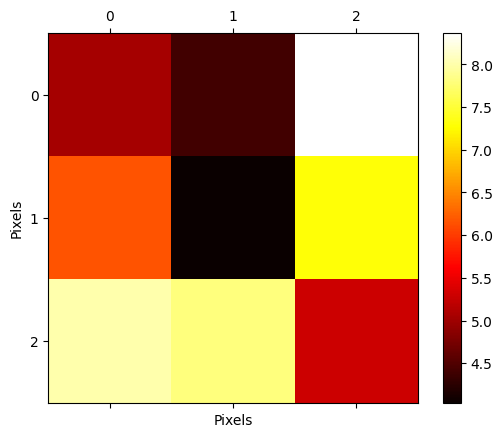

In [20]:
#Set first figure
fig = plt.figure()
ax = fig.add_subplot(111)

#Create matrix colored
image = ax.matshow(mCorrelation, cmap="hot")

#Set title image
#plt.title("Distribuition of correlations by colors using " + correlationName)

#Create the legend
fig.colorbar(image)

#Set the x and y labels
plt.xlabel("Pixels")
plt.ylabel("Pixels")

#Save figure
plt.savefig("Distribuicao de correlacao por coloracao usando " + correlationName + ".png", dpi=330)

**Second figure - Iterations and its correlations**

The iteration 5 correspond the best correlation


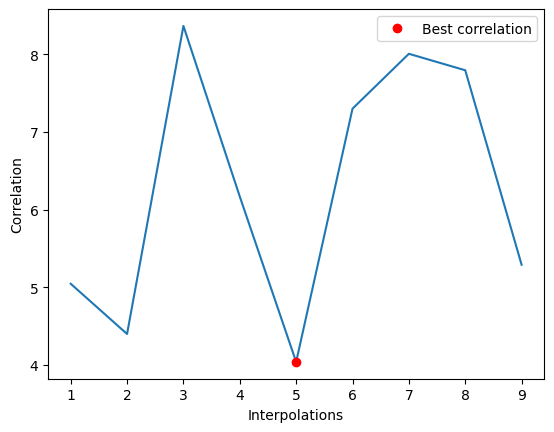

In [21]:
#List to receive all correlation values
listValuesMatrix = []

for i in range(alphas):
   for j in range(betas):
       #Add all correlation values inside list
      listValuesMatrix.append(mCorrelation[i,j])

#List to stored a sequence of numbers
sequence = []

#Loop to create an sequence list of numbers that begin at 1 and end in the number of coorelations
for x in range(1, len(listValuesMatrix)+1,1):
   sequence.append(x)

#Set second figure
fig, ax = plt.subplots(1,1)

#Get the index in the list of best correlation
index = listValuesMatrix.index(value)

#Use the index previously obtained and get the number of iteration referent of better correlation
iterationss = sequence[index]

print("The iteration " + str(iterationss) + " correspond the best correlation")

#Create a line graphic (iterations / correlations)
plt.plot(sequence, listValuesMatrix)

#Create a point graphic (best coorelation)
plt.plot(iterationss, listValuesMatrix[index], "ro", label = "Best correlation")

#Set legend
plt.legend()

#Set title image
#plt.title("Iterations and its correlations using " + correlationName)

#Set the x and y labels
plt.xlabel("Interpolations")
plt.ylabel("Correlation")

#Save figure
plt.savefig("Iteracoes e suas correlacoes usando " + correlationName + ".png", dpi=330)

**Third figure - Localization of reference matrix within the search matrix**

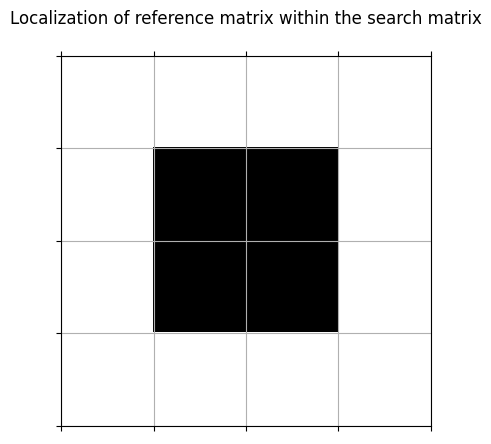

In [22]:
#Create a zeros matrix with same size from search matrix
positionCorrelation = np.zeros([Lp, Cp])

#Get the list with positions (values) by its iteration wich occured the best correlation (key)
listPositionss = dictPositions[iterationss]

#Loop to acess the positions of best correlation in the search matrix and change its color
for y in range(0,int(len(listPositionss)),2):
    positionCorrelation[listPositionss[y], listPositionss[y+1]] = 255

#Set third figure
fig = plt.figure()
ax = fig.add_subplot(111)

#Create matrix colored
image = ax.matshow(positionCorrelation, cmap="Greys")

#Set title image
plt.title("Localization of reference matrix within the search matrix")

#Set color ticks
plt.xticks(color='w')
plt.yticks(color='w')

#Adjust the ticks
plt.xticks(np.arange(-0.5, Lp))
plt.yticks(np.arange(-0.5, Cp))

#Plot grid
plt.grid()

#Save figure
plt.savefig("Localizacao e destaque da matrix de pesquisa na matriz de pesquisa utilizando " + correlationName + ".png", dpi=330)

In [23]:
np.savetxt('CorrelatioMatrix.txt', mCorrelation, fmt='%.2f')

**---------------------------------------------------------------------**

**Get values from reference matrix 'inside' search matrix**

In [24]:
#Create an empty matrix with zeros with the size
matrixReduceS = np.zeros([Lr, Cr])

#Create empty lists to store positions of rows and columns respectivally
rows = []
columns = []

#Get the list of positions for the best iteration
listPositionss = dictPositions[iterationss]

#To store positions from row and column at its specifics lists
for y in range(0,int(len(listPositionss)),2):
    rows.append(listPositionss[y])
    columns.append(listPositionss[y+1])

#Minimum and maximum position from rows
minRow = min(rows)
maxRow = max(rows)

#Minimum and maximum position from columns
minColumn = min(columns)
maxColumn = max(columns)

#print(minRow)
#print(maxRow)
#print(rows)
#print(columns)

#Recort the specific area at search matrix that it's 'equal' to reference matrix
RecortmatrixP = matrixP[minRow:maxRow+1, minColumn:maxColumn+1]
print(RecortmatrixP)


[[ 45 172]
 [236  83]]


**Convert matrix to TXT file**

In [25]:
np.savetxt('matrixInterval.txt', RecortmatrixP, fmt='%.0f')

**Read the file created before**

In [26]:
with open('matrixInterval.txt') as txtFile:
    matrix = txtFile.read()

**Define header**

In [27]:
headerr = "P2\n" + "# Created by IrfanView\n" + str(Lr)+ " " + str(Cr) + "\n255\n"


**To merge the two files readed and save just aat on TXT file**

In [28]:
headerr += matrix

with open ('IrfanView.pgm', 'w') as txtFile:
    txtFile.write(headerr)